In [ ]:
from ODT import *

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

: 

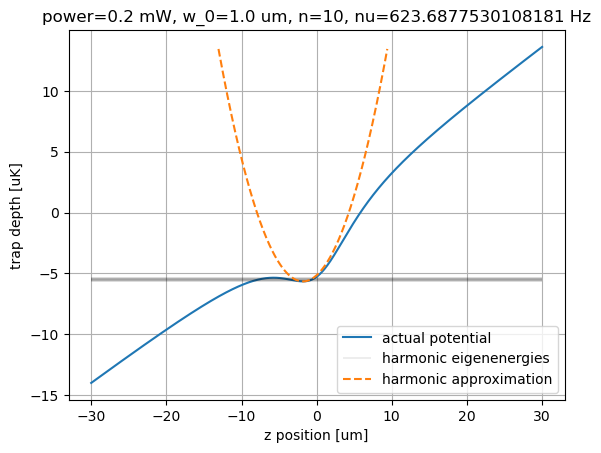

10

In [6]:
options = {
    "prop_dir" : "v", #direction of beam propagation, "v" for vertical and "h" for horizontal
    "wavelength" : 532*u.nm,
    "alpha" : 184.4, # Dy polarizability in terms of a_0
    "dy_mass" : 164*u.u,
    "dy_mag_moment" : 9.93 * ac.muB,
    "power" : 0.2*u.mW,
    "w_0" : 1*u.um, #beam waist in transverse-plane
    "gravity" : True, #bool for gravity in z direction
    "mag_dir" : "v", #direction of magnetic field and gradient, "v" for vertical and "h" for horizontal
    "mag_grad" : 4*u.G/u.cm, #magnetic gradient
    "mag_offset" : 0*u.G, #magnetic offset
    "mJ" : 0, #magnetic quantum number
    "ref_ind" : 1  #refractive index
}
trap = ODP_1D(options)

z = np.linspace(-30,30,1000)*u.um
trap.get_axial_occ_analytic(z,plot=True)

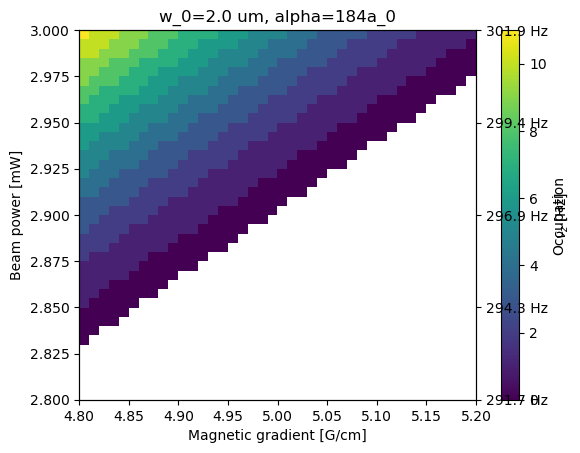

In [12]:
options = {
    "prop_dir" : "v", #direction of beam propagation, "v" for vertical and "h" for horizontal
    "wavelength" : 532*u.nm,
    "alpha" : 184.4, # Dy polarizability in terms of a_0
    "dy_mass" : 164*u.u,
    "dy_mag_moment" : 9.93 * ac.muB,
    "power" : 3*u.mW,
    "w_0" : 2*u.um, #beam waist in transverse-plane
    "gravity" : True, #bool for gravity in z direction
    "mag_dir" : "v", #direction of magnetic field and gradient, "v" for vertical and "h" for horizontal
    "mag_grad" : 120*u.G/u.cm, #magnetic gradient
    "mag_offset" : 0*u.G, #magnetic offset
    "mJ" : 0, #magnetic quantum number
    "ref_ind" : 1  #refractive index
}
trap = ODP_1D(options)

z = np.linspace(-50,50,1000)*u.um
#power = np.linspace(0.1,1,10)*u.mW
power = np.linspace(2.8,3,40)*u.mW
freq = np.zeros(len(power))*u.Hz
#mag_grad = np.linspace(4.5,4.9,10)*u.G/u.cm
mag_grad = np.linspace(4.8,5.2,40)*u.G/u.cm
power2D, mag_grad2D = np.meshgrid(power,mag_grad)

occupation = np.zeros_like(power2D).value

for i,p in enumerate(power):
    for j,grad in enumerate(mag_grad):
        trap.power = p
        trap.mag_grad = grad
        try:
            n = trap.get_axial_occ_analytic(z,plot=False)
        except:
            n = np.nan
        occupation[i,j] = n
    freq[i] = trap.nu_z
    #print(i)
"""  
plt.imshow(occupation,extent=[np.min(mag_grad).to(u.G/u.cm).value,np.max(mag_grad).to(u.G/u.cm).value,
                                                        np.min(power).to(u.mW).value,np.max(power).to(u.mW).value]
                                                        ,aspect="auto",origin="lower",vmax=10)
plt.colorbar()
plt.title(f"w_0={trap.w_0}, alpha={184}a_0")
plt.ylabel("beam power [mW]")
plt.xlabel("magnetic gradient [G/cm]")
plt.show()
#print(occupation)"""

# Plot the main data
fig, ax1 = plt.subplots()
im = ax1.imshow(
    occupation,
    extent=[
        np.min(mag_grad).to(u.G / u.cm).value,
        np.max(mag_grad).to(u.G / u.cm).value,
        np.min(power).to(u.mW).value,
        np.max(power).to(u.mW).value
    ],
    aspect="auto",
    origin="lower"
)

# Add colorbar
plt.colorbar(im, ax=ax1, label="Occupation")
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.5)  # Offset colorbar to the right
#cbar = plt.colorbar(im, cax=cax, label="Occupation")

# Primary axis labels
ax1.set_xlabel("Magnetic gradient [G/cm]")
ax1.set_ylabel("Beam power [mW]")
ax1.set_title(f"w_0={trap.w_0}, alpha={184}a_0")

# Add secondary y-axis for trap.nu_z
ax2 = ax1.twinx()

# Compute nu_z for given power values (example using trap)
nu_z_vals = freq

# Map power to nu_z for the second axis
ax2.set_ylim(ax1.get_ylim())  # Align y-axis limits
ax2.set_yticks(np.linspace(np.min(power).to(u.mW).value, np.max(power).to(u.mW).value, 5))  # Match tick locations
ax2.set_yticklabels([f"{nu_z:.1f}" for nu_z in np.interp(
    np.linspace(np.min(power).to(u.mW).value, np.max(power).to(u.mW).value, 5),
    power.to(u.mW).value,
    nu_z_vals
)])  # Map ticks to nu_z values
ax2.set_ylabel(r"$\nu_z$ [Hz]")  # Second axis label

plt.show()


----------------------

0.055960553528076495 Hz


Exception: fit was unsuccessful :(

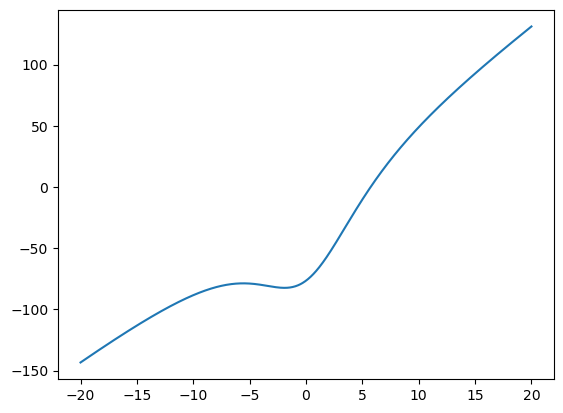

In [3]:
options = {
    "prop_dir" : "v", #direction of beam propagation, "v" for vertical and "h" for horizontal
    "wavelength" : 532*u.nm,
    "alpha" : 184.4, # Dy polarizability in terms of a_0
    "dy_mass" : 164*u.u,
    "dy_mag_moment" : 9.93 * ac.muB,
    "power" : 2.9*u.mW,
    "w_0" : 1*u.um, #beam waist in transverse-plane
    "gravity" : True, #bool for gravity in z direction
    "mag_dir" : "v", #direction of magnetic field and gradient, "v" for vertical and "h" for horizontal
    "mag_grad" : 100*u.G/u.cm, #magnetic gradient
    "mag_offset" : 0*u.G, #magnetic offset
    "mJ" : 0, #magnetic quantum number
    "ref_ind" : 1  #refractive index
}
trap = ODP_1D(options)

z = np.linspace(-20,20,1000)*u.um
trap.get_axial_occ(z,fit_fac=2,p0=[2e3,-1.5e-27,-1e6],plot=True,plot_fac=1)

In [ ]:
options = {
    "prop_dir" : "v", #direction of beam propagation, "v" for vertical and "h" for horizontal
    "wavelength" : 532*u.nm,
    "alpha" : 184.4, # Dy polarizability in terms of a_0
    "dy_mass" : 164*u.u,
    "dy_mag_moment" : 9.93 * ac.muB,
    "power" : 3*u.mW,
    "w_0" : 1*u.um, #beam waist in transverse-plane
    "gravity" : True, #bool for gravity in z direction
    "mag_dir" : "v", #direction of magnetic field and gradient, "v" for vertical and "h" for horizontal
    "mag_grad" : 120*u.G/u.cm, #magnetic gradient
    "mag_offset" : 0*u.G, #magnetic offset
    "mJ" : 0, #magnetic quantum number
    "ref_ind" : 1  #refractive index
}
trap = ODP_1D(options)

z = np.linspace(-30,30,1000)*u.um
power = np.linspace(.1,2,50)*u.mW
mag_grad = np.linspace(0.1,50,50)*u.G/u.cm
power2D, mag_grad2D = np.meshgrid(power,mag_grad)

occupation = np.zeros_like(power2D).value

for i,p in enumerate(power):
    for j,grad in enumerate(mag_grad):
        trap.power = p
        trap.mag_grad = grad
        try:
            n = trap.get_axial_occ(z,plot=False)
        except:
            n = np.nan
        occupation[i,j] = n
    
plt.imshow(occupation,extent=[np.min(mag_grad).to(u.G/u.cm).value,np.max(mag_grad).to(u.G/u.cm).value,
                                                        np.min(power).to(u.mW).value,np.max(power).to(u.mW).value]
                                                        ,aspect="auto",origin="lower")
plt.colorbar()
plt.title(f"w_0={trap.w_0}, alpha={184}a_0")
plt.ylabel("beam power [mW]")
plt.xlabel("magnetic gradient [G/cm]")
plt.show()
#print(occupation)


435.5842083790574 Hz
435.5842086099563 Hz
435.5842084856596 Hz
435.5842084946419 Hz
435.58420847718554 Hz
435.5842082225963 Hz
435.58420839122346 Hz
435.5842084934435 Hz
435.5842086632975 Hz
435.5842085036327 Hz
435.5842089396052 Hz
435.58420872385625 Hz
435.5842086652499 Hz
435.5842085824294 Hz
435.58420857868225 Hz
435.58420872162156 Hz
435.58420857789076 Hz
435.5842082364966 Hz
435.58420823613636 Hz
435.5842081455855 Hz
435.58420834536815 Hz
435.5842087118483 Hz


c:\Users\peter\Uni-Bulk\FerDy_Chomaz\spilling_code\ODT.py:97: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(self.harm_pot, z_fit,pot_fit,p0=p0)


435.5837618949728 Hz
435.58420863276746 Hz
435.5842074810793 Hz
435.5842078705293 Hz
435.5842085835111 Hz
435.5842084709728 Hz
435.5842091916149 Hz
435.58420725134727 Hz
435.5842076775609 Hz
435.58420984365523 Hz
435.58420960202403 Hz
435.5842083031921 Hz
435.5842079584514 Hz
435.5842083083008 Hz
435.58420939628354 Hz
435.5842088085156 Hz
435.5842102124811 Hz
435.58420951206404 Hz
435.58420937241954 Hz
435.5842083809589 Hz
435.58421189730785 Hz
435.5842090900296 Hz
435.5842085436231 Hz
435.58420925273265 Hz
435.584209183769 Hz
435.584209764057 Hz
435.58420769539714 Hz
435.5842117262981 Hz
513.1313431802693 Hz
513.1313426859917 Hz
513.1313429741855 Hz
513.1313433738354 Hz
513.1313429384834 Hz
513.1314313403901 Hz
513.1313429652569 Hz
513.131342693552 Hz
513.1313429502266 Hz
513.1313427290929 Hz
513.1313430421528 Hz
513.1313430628579 Hz
513.1313430516095 Hz
513.1313431982534 Hz
513.1313429590673 Hz
513.1313425976647 Hz
513.1313425335395 Hz
513.1313426196738 Hz
513.131342966325 Hz
513.131

c:\Users\peter\Uni-Bulk\FerDy_Chomaz\spilling_code\ODT.py:97: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(self.harm_pot, z_fit,pot_fit,p0=p0)


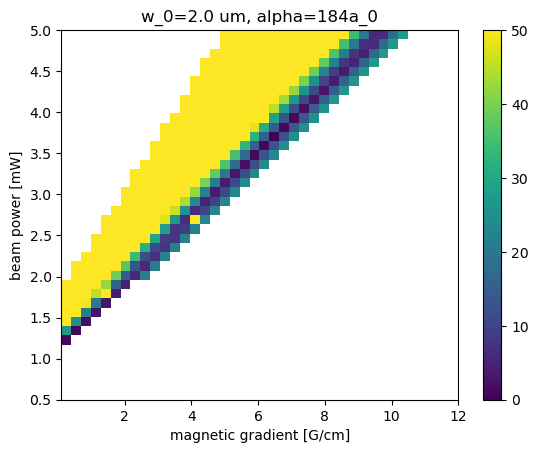

In [ ]:
options = {
    "prop_dir" : "v", #direction of beam propagation, "v" for vertical and "h" for horizontal
    "wavelength" : 532*u.nm,
    "alpha" : 184.4, # Dy polarizability in terms of a_0
    "dy_mass" : 164*u.u,
    "dy_mag_moment" : 9.93 * ac.muB,
    "power" : 3*u.mW,
    "w_0" : 2*u.um, #beam waist in transverse-plane
    "gravity" : True, #bool for gravity in z direction
    "mag_dir" : "v", #direction of magnetic field and gradient, "v" for vertical and "h" for horizontal
    "mag_grad" : 120*u.G/u.cm, #magnetic gradient
    "mag_offset" : 0*u.G, #magnetic offset
    "mJ" : 0, #magnetic quantum number
    "ref_ind" : 1  #refractive index
}
trap = ODP_1D(options)

z = np.linspace(-30,30,1000)*u.um
power = np.linspace(.5,5,40)*u.mW
mag_grad = np.linspace(0.1,12,40)*u.G/u.cm
power2D, mag_grad2D = np.meshgrid(power,mag_grad)

occupation = np.zeros_like(power2D).value

for i,p in enumerate(power):
    for j,grad in enumerate(mag_grad):
        trap.power = p
        trap.mag_grad = grad
        try:
            n = trap.get_axial_occ(z,plot=False)
        except:
            n = np.nan
        occupation[i,j] = n
    
plt.imshow(occupation,extent=[np.min(mag_grad).to(u.G/u.cm).value,np.max(mag_grad).to(u.G/u.cm).value,
                                                        np.min(power).to(u.mW).value,np.max(power).to(u.mW).value]
                                                        ,aspect="auto",origin="lower",vmax=50)
plt.colorbar()
plt.title(f"w_0={trap.w_0}, alpha={184}a_0")
plt.ylabel("beam power [mW]")
plt.xlabel("magnetic gradient [G/cm]")
plt.show()
#print(occupation)


c:\Users\peter\Uni-Bulk\FerDy_Chomaz\spilling_code\ODT.py:97: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(self.harm_pot, z_fit,pot_fit,p0=p0)


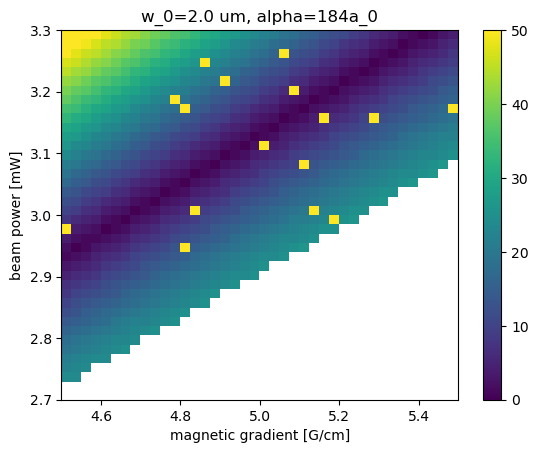

In [ ]:
options = {
    "prop_dir" : "v", #direction of beam propagation, "v" for vertical and "h" for horizontal
    "wavelength" : 532*u.nm,
    "alpha" : 184.4, # Dy polarizability in terms of a_0
    "dy_mass" : 164*u.u,
    "dy_mag_moment" : 9.93 * ac.muB,
    "power" : 3*u.mW,
    "w_0" : 2*u.um, #beam waist in transverse-plane
    "gravity" : True, #bool for gravity in z direction
    "mag_dir" : "v", #direction of magnetic field and gradient, "v" for vertical and "h" for horizontal
    "mag_grad" : 120*u.G/u.cm, #magnetic gradient
    "mag_offset" : 0*u.G, #magnetic offset
    "mJ" : 0, #magnetic quantum number
    "ref_ind" : 1  #refractive index
}
trap = ODP_1D(options)

z = np.linspace(-30,30,1000)*u.um
power = np.linspace(2.7,3.3,40)*u.mW
mag_grad = np.linspace(4.5,5.5,40)*u.G/u.cm
power2D, mag_grad2D = np.meshgrid(power,mag_grad)

occupation = np.zeros_like(power2D).value

for i,p in enumerate(power):
    for j,grad in enumerate(mag_grad):
        trap.power = p
        trap.mag_grad = grad
        try:
            n = trap.get_axial_occ(z,plot=False)
        except:
            n = np.nan
        occupation[i,j] = n
    
plt.imshow(occupation,extent=[np.min(mag_grad).to(u.G/u.cm).value,np.max(mag_grad).to(u.G/u.cm).value,
                                                        np.min(power).to(u.mW).value,np.max(power).to(u.mW).value]
                                                        ,aspect="auto",origin="lower",vmax=50)
plt.colorbar()
plt.title(f"w_0={trap.w_0}, alpha={184}a_0")
plt.ylabel("beam power [mW]")
plt.xlabel("magnetic gradient [G/cm]")
plt.show()
#print(occupation)


In [ ]:
options = {
    "prop_dir" : "v", #direction of beam propagation, "v" for vertical and "h" for horizontal
    "wavelength" : 532*u.nm,
    "alpha" : 184.4, # Dy polarizability in terms of a_0
    "dy_mass" : 164*u.u,
    "dy_mag_moment" : 9.93 * ac.muB,
    "power" : 3*u.mW,
    "w_0" : 2*u.um, #beam waist in transverse-plane
    "gravity" : True, #bool for gravity in z direction
    "mag_dir" : "v", #direction of magnetic field and gradient, "v" for vertical and "h" for horizontal
    "mag_grad" : 5*u.G/u.cm, #magnetic gradient
    "mag_offset" : 0*u.G, #magnetic offset
    "mJ" : 0, #magnetic quantum number
    "ref_ind" : 1  #refractive index
}
trap = ODP_1D(options)

z = np.linspace(-30,30,1000)*u.um
trap.get_axial_occ(z,fit_fac=2,p0=[1e8,-1.5e-27,0],plot=True,plot_fac=2)

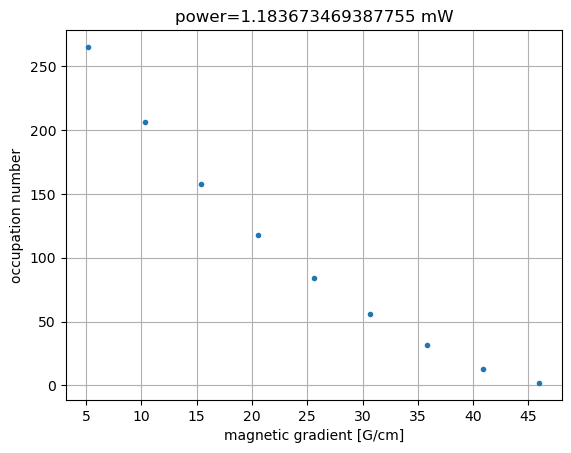

In [ ]:
n = 9

plt.plot(mag_grad,occupation[n,:],".")
plt.title(f"power={power[n]}")
plt.xlabel("magnetic gradient [G/cm]")
plt.ylabel("occupation number")
plt.grid()
plt.show()

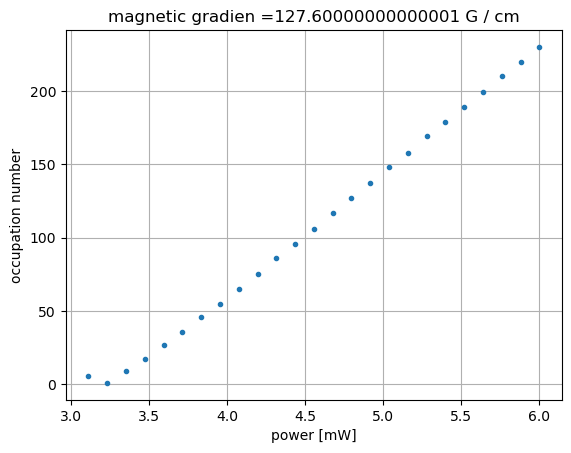

In [ ]:
n = 25

plt.plot(power,occupation[:,n],".")
plt.title(f"magnetic gradien ={mag_grad[n]}")
plt.xlabel("power [mW]")
plt.ylabel("occupation number")
plt.grid()
plt.show()

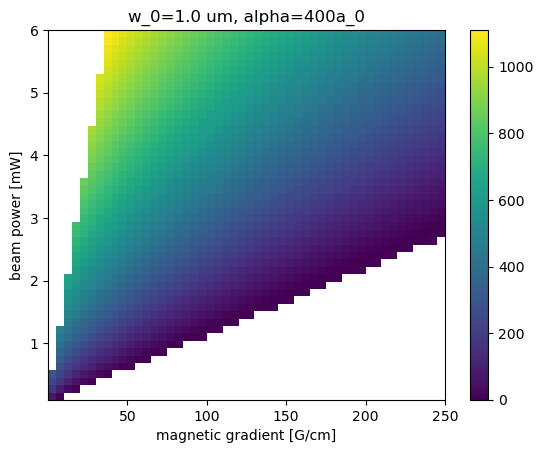

In [ ]:
options = {
    "prop_dir" : "v", #direction of beam propagation, "v" for vertical and "h" for horizontal
    "wavelength" : 532*u.nm,
    "alpha" : 400,#184.4, # Dy polarizability in terms of a_0
    "dy_mass" : 164*u.u,
    "dy_mag_moment" : 9.93 * ac.muB,
    "power" : 3*u.mW,
    "w_0" : 1*u.um, #beam waist in transverse-plane
    "gravity" : True, #bool for gravity in z direction
    "mag_dir" : "v", #direction of magnetic field and gradient, "v" for vertical and "h" for horizontal
    "mag_grad" : 120*u.G/u.cm, #magnetic gradient
    "mag_offset" : 0*u.G, #magnetic offset
    "mJ" : 0, #magnetic quantum number
    "ref_ind" : 1  #refractive index
}
trap = ODP_1D(options)

power = np.linspace(.1,6,50)*u.mW
mag_grad = np.linspace(0.1,250,50)*u.G/u.cm
power2D, mag_grad2D = np.meshgrid(power,mag_grad)

occupation = np.zeros_like(power2D).value

for i,p in enumerate(power):
    for j,grad in enumerate(mag_grad):
        trap.power = p
        trap.mag_grad = grad
        try:
            n = trap.get_axial_occ(z,plot=False)
        except:
            n = np.nan
        occupation[i,j] = n
    
plt.imshow(occupation,extent=[np.min(mag_grad).to(u.G/u.cm).value,np.max(mag_grad).to(u.G/u.cm).value,
                                                        np.min(power).to(u.mW).value,np.max(power).to(u.mW).value]
                                                        ,aspect="auto",origin="lower")
plt.colorbar()
plt.title(f"w_0={trap.w_0}, alpha={400}a_0")
plt.ylabel("beam power [mW]")
plt.xlabel("magnetic gradient [G/cm]")
plt.show()
#print(occupation)


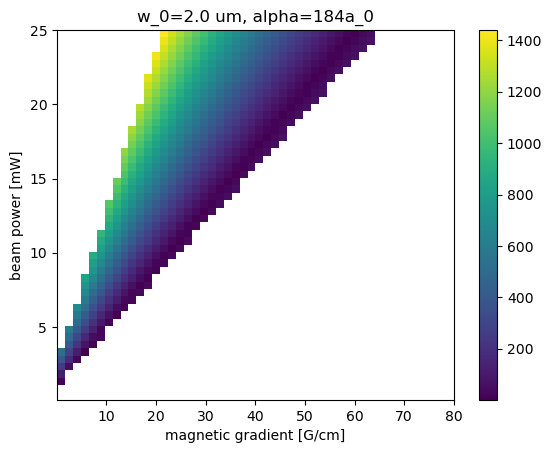

In [ ]:
options = {
    "prop_dir" : "v", #direction of beam propagation, "v" for vertical and "h" for horizontal
    "wavelength" : 532*u.nm,
    "alpha" : 184.4, # Dy polarizability in terms of a_0
    "dy_mass" : 164*u.u,
    "dy_mag_moment" : 9.93 * ac.muB,
    "power" : 3*u.mW,
    "w_0" : 2*u.um, #beam waist in transverse-plane
    "gravity" : True, #bool for gravity in z direction
    "mag_dir" : "v", #direction of magnetic field and gradient, "v" for vertical and "h" for horizontal
    "mag_grad" : 120*u.G/u.cm, #magnetic gradient
    "mag_offset" : 0*u.G, #magnetic offset
    "mJ" : 0, #magnetic quantum number
    "ref_ind" : 1  #refractive index
}
trap = ODP_1D(options)

z = np.linspace(-40,40,1000)*u.um

power = np.linspace(.1,25,50)*u.mW
mag_grad = np.linspace(0.1,80,50)*u.G/u.cm
power2D, mag_grad2D = np.meshgrid(power,mag_grad)

occupation = np.zeros_like(power2D).value

for i,p in enumerate(power):
    for j,grad in enumerate(mag_grad):
        trap.power = p
        trap.mag_grad = grad
        try:
            n = trap.get_axial_occ(z,plot=False)
        except:
            n = np.nan
        occupation[i,j] = n
    
plt.imshow(occupation,extent=[np.min(mag_grad).to(u.G/u.cm).value,np.max(mag_grad).to(u.G/u.cm).value,
                                                        np.min(power).to(u.mW).value,np.max(power).to(u.mW).value]
                                                        ,aspect="auto",origin="lower")
plt.colorbar()
plt.title(f"w_0={trap.w_0}, alpha={184}a_0")
plt.ylabel("beam power [mW]")
plt.xlabel("magnetic gradient [G/cm]")
plt.show()
#print(occupation)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices